In [1]:
import os 
 
import cv2 
import numpy as np 
import requests 
import torch 
import torch.onnx 
from torch import nn 
 
class SuperResolutionNet(nn.Module): 
    def __init__(self, upscale_factor): 
        super().__init__() 
        self.upscale_factor = upscale_factor 
        self.img_upsampler = nn.Upsample( 
            scale_factor=self.upscale_factor, 
            mode='bicubic', 
            align_corners=False) 
 
        self.conv1 = nn.Conv2d(3,64,kernel_size=9,padding=4) 
        self.conv2 = nn.Conv2d(64,32,kernel_size=1,padding=0) 
        self.conv3 = nn.Conv2d(32,3,kernel_size=5,padding=2) 
 
        self.relu = nn.ReLU() 
 
    def forward(self, x): 
        x = self.img_upsampler(x) 
        out = self.relu(self.conv1(x)) 
        out = self.relu(self.conv2(out)) 
        out = self.conv3(out) 
        return out 
 
# Download checkpoint and test image 
urls = ['https://download.openmmlab.com/mmediting/restorers/srcnn/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth', 
    'https://raw.githubusercontent.com/open-mmlab/mmediting/master/tests/data/face/000001.png'] 
names = ['srcnn.pth', 'face.png'] 
for url, name in zip(urls, names): 
    if not os.path.exists(name): 
        open(name, 'wb').write(requests.get(url).content) 
 
def init_torch_model(): 
    torch_model = SuperResolutionNet(upscale_factor=3) 
 
    state_dict = torch.load('srcnn.pth')['state_dict'] 
 
    # Adapt the checkpoint 
    for old_key in list(state_dict.keys()): 
        new_key = '.'.join(old_key.split('.')[1:]) 
        state_dict[new_key] = state_dict.pop(old_key) 
 
    torch_model.load_state_dict(state_dict) 
    torch_model.eval() 
    return torch_model 
 
model = init_torch_model() 
input_img = cv2.imread('face.png').astype(np.float32) 
 
# HWC to NCHW 
input_img = np.transpose(input_img, [2, 0, 1]) 
input_img = np.expand_dims(input_img, 0) 
 
# Inference 
torch_output = model(torch.from_numpy(input_img)).detach().numpy() 
 
# NCHW to HWC 
torch_output = np.squeeze(torch_output, 0) 
torch_output = np.clip(torch_output, 0, 255) 
torch_output = np.transpose(torch_output, [1, 2, 0]).astype(np.uint8) 
 
# Show image 
cv2.imwrite("face_torch.png", torch_output)

/opt/miniconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [9]:
import torch
probs = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5])
probs = torch.distributions.Categorical(probs=probs)
action = probs.sample()
print(action)

tensor(0)


In [7]:
import torch
import torch.distributions as dist

# 创建一个均值为0，标准差为1的正态分布
mean = 0.0
std = 1.0
normal_dist = dist.Normal(mean, std)
print(normal_dist)

# 从分布中采样
sample = normal_dist.sample()

# 计算样本的概率密度
prob_density = normal_dist.log_prob(sample)

# 打印结果
print(f"Sample: {sample}")
print(f"Log Probability Density: {prob_density}")


Normal(loc: 0.0, scale: 1.0)
Sample: 0.14062602818012238
Log Probability Density: -0.9288263320922852


In [1]:
getattr(torch.cuda, 'is_available', lambda: True)

NameError: name 'torch' is not defined

In [4]:
class Net:
    def __init__(self, x=100):
        print("Net init")
        print('the x is: ', x)
    
    @classmethod
    def create_net(cls, m):
        print("create_net")
        cls(m)


y = 520
Net.create_net(y)

create_net
Net init
the x is:  520


In [6]:
import numpy as np

dummy_prompt_token_ids = np.random.randint(10000,
                                            size=(8, 32))
dummy_inputs = [{
    "prompt_token_ids": batch
} for batch in dummy_prompt_token_ids.tolist()]
dummy_inputs[0].values()
# dummy_inputs

dict_values([[9303, 5001, 690, 9624, 4210, 3292, 4955, 6776, 9684, 7200, 2110, 7076, 9872, 5898, 2265, 3973, 3992, 1451, 9857, 6583, 7729, 7630, 869, 1073, 110, 7181, 6160, 2075, 3709, 5726, 5590, 8224]])

In [5]:
import torch.nn as nn
import torch

finfo = torch.finfo(torch.float8_e5m2)
finfo

finfo(resolution=1, min=-57344, max=57344, eps=0.25, smallest_normal=6.10352e-05, tiny=6.10352e-05, dtype=float8_e5m2)

In [1]:
from tqdm import tqdm
pbar = tqdm(
                total=10,
                desc="Processed prompts",
                dynamic_ncols=True,
                postfix=(f"est. speed input: {0:.2f} toks/s, "
                         f"output: {0:.2f} toks/s"),
            )

for i in range(10):
    print(pbar.format_dict['elapsed'])
    pbar.update(1)

Processed prompts:   0%|          | 0/10 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

0.00010514259338378906
0.00012612342834472656
0.00013399124145507812
0.00014209747314453125
0.00014901161193847656
0.00015592575073242188
0.00016307830810546875
0.00016999244689941406
0.0001761913299560547
0.00018310546875


In [3]:
class Test:
    def __init__(self, c=0):
        print(c)
        self.rank = 0
    
    @classmethod
    def test_classmethod(cls, rank=9):
        print("test_classmethod")
        cls(rank)
Test.test_classmethod()

test_classmethod
9


In [4]:
import torch

t = torch.rand(3, 4, 2)
print(t)

tensor([[[0.6197, 0.8165],
         [0.5405, 0.2133],
         [0.9509, 0.8153],
         [0.6293, 0.1230]],

        [[0.6598, 0.7861],
         [0.3918, 0.6148],
         [0.4171, 0.8185],
         [0.9584, 0.9309]],

        [[0.0933, 0.2751],
         [0.1459, 0.4152],
         [0.6703, 0.9592],
         [0.6810, 0.3643]]])


In [5]:
a = t.reshape(-1).topk(k=10)
a

torch.return_types.topk(
values=tensor([0.9592, 0.9584, 0.9509, 0.9309, 0.8185, 0.8165, 0.8153, 0.7861, 0.6810,
        0.6703]),
indices=tensor([21, 14,  4, 15, 13,  1,  5,  9, 22, 20]))

In [7]:
q = t > a.values[-1]
q

tensor([[[False,  True],
         [False, False],
         [ True,  True],
         [False, False]],

        [[False,  True],
         [False, False],
         [False,  True],
         [ True,  True]],

        [[False, False],
         [False, False],
         [False,  True],
         [ True, False]]])

In [8]:
ou = t * q
ou

tensor([[[0.0000, 0.8165],
         [0.0000, 0.0000],
         [0.9509, 0.8153],
         [0.0000, 0.0000]],

        [[0.0000, 0.7861],
         [0.0000, 0.0000],
         [0.0000, 0.8185],
         [0.9584, 0.9309]],

        [[0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.9592],
         [0.6810, 0.0000]]])

In [9]:
ou1 = t*~q
ou1

tensor([[[0.6197, 0.0000],
         [0.5405, 0.2133],
         [0.0000, 0.0000],
         [0.6293, 0.1230]],

        [[0.6598, 0.0000],
         [0.3918, 0.6148],
         [0.4171, 0.0000],
         [0.0000, 0.0000]],

        [[0.0933, 0.2751],
         [0.1459, 0.4152],
         [0.6703, 0.0000],
         [0.0000, 0.3643]]])

In [10]:
s = torch.tensor([1, 2, 3, 0])
s.numel()

4

In [1]:
import matplotlib.pyplot as plt
import numpy as np

provinces = ['安徽', '北京', '福建', '甘肃', '广西', '贵州', '河南', '黑龙江', '吉林', '江苏', '江西', '南京', '内蒙古', '宁夏', '青海', '山东', '陕西', '上海', '四川', '武汉', '新疆', '云南', '浙江']
values = [2, 2, 3, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2]


# 创建热力图
plt.figure(figsize=(10,6))
plt.pcolor(np.array([[value1, value2], [value3, value4]]), cmap='viridis')
plt.xticks(rotation=45, ha='right')
plt.yticks()
plt.title('中国省份热力图')
plt.ylabel('省份')
plt.xlabel('热力值')
plt.show()


KeyError: '纬度'

In [1]:
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts

# 假设你的数据已经存储在一个CSV文件中
provinces = ['安徽', '北京', '福建', '甘肃', '广西', '贵州', '河南', '黑龙江', '吉林', '江苏', '江西', '南京', '内蒙古', '宁夏', '青海', '山东', '陕西', '上海', '四川', '武汉', '新疆', '云南', '浙江']
values = [2, 2, 3, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2]


# 创建热力图
map_chart = (
    Map()
    .add(
        "单位数量",
        [list(z) for z in zip(provinces, values)],
        "china"
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="中国省份热力图"),
        visualmap_opts=opts.VisualMapOpts(max_=max(values)),
    )
)

# 渲染图表到本地HTML文件
map_chart.render('china_heatmap.html')

# 如果你使用Jupyter Notebook, 可以直接显示图表
map_chart.render_notebook()

In [4]:
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts

# 假设你的数据已经存储在一个CSV文件中
provinces = ['安徽', '北京', '福建', '甘肃', '广西', '贵州', '河南', '黑龙江', '吉林', '江苏', '江西', '南京', '内蒙古', '宁夏', '青海', '山东', '陕西', '上海', '四川', '武汉', '新疆', '云南', '浙江']
values = [2, 2, 3, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2]

# 创建热力图
map_chart = (
    Map()
    .add(
        "单位数量",
        [list(z) for z in zip(provinces, values)],
        "china"
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="中国省份热力图"),
        visualmap_opts=opts.VisualMapOpts(
            is_piecewise=True,
            pieces=[
                {"min": 3, "max": 3, "label": "3", "color": "#FFB6C1"},
                {"min": 2, "max": 2, "label": "2", "color": "#FFA500"},
                {"min": 1, "max": 1, "label": "1", "color": "#FFFF00"}
            ],
            max_=3,
            is_calculable=True,
            range_color=["#FFFF00", "#FFA500", "#FF0000"]
        )
    )
)

# 渲染图表到本地HTML文件
map_chart.render('china_heatmap.html')

# 如果你使用Jupyter Notebook, 可以直接显示图表
map_chart.render_notebook()

In [5]:
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.globals import ThemeType

# 手动输入数据
data = pd.DataFrame({
    '省份': ['安徽省', '北京市', '福建省', '甘肃省', '广西壮族自治区', 
           '贵州省', '河南省', '黑龙江省', '湖北省', '吉林省', 
           '江苏省', '江西省', '内蒙古自治区', '宁夏回族自治区', '青海省', 
           '山东省', '陕西省', '上海市', '四川省', '新疆维吾尔自治区', 
           '云南省', '浙江省'],
    '数量': [2, 2, 3, 2, 1, 
           1, 3, 1, 1, 2, 
           2, 1, 1, 1, 1, 
           1, 2, 2, 1, 2, 
           2, 1]
})

# 创建省份和数量的列表
provinces = data['省份'].tolist()
values = data['数量'].tolist()

# 创建热力图
map_chart = (
    Map(init_opts=opts.InitOpts(width="1000px", height="800px", theme=ThemeType.LIGHT))
    .add(
        "单位数量",
        [list(z) for z in zip(provinces, values)],
        "china"
    )
    .set_global_opts(
        # title_opts=opts.TitleOpts(title="中国省份热力图"),
        visualmap_opts=opts.VisualMapOpts(
            is_piecewise=True,
            pieces=[
                {"min": 3, "max": 3, "label": "3", "color": "#FF0000"},
                {"min": 2, "max": 2, "label": "2", "color": "#FFA500"},
                {"min": 1, "max": 1, "label": "1", "color": "#FFFF00"}
            ],
            max_=3,
            is_calculable=True
        )
    )
)

# 渲染图表到本地HTML文件
map_chart.render('china_heatmap1.html')

# 如果你使用Jupyter Notebook, 可以直接显示图表
map_chart.render_notebook()

In [1]:
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.globals import ThemeType

# 手动输入数据
data = pd.DataFrame({
    '省份': ['安徽省', '北京市', '福建省', '甘肃省', '广西壮族自治区', 
           '贵州省', '河南省', '黑龙江省', '湖北省', '吉林省', 
           '江苏省', '江西省', '内蒙古自治区', '宁夏回族自治区', '青海省', 
           '山东省', '陕西省', '上海市', '四川省', '新疆维吾尔自治区', 
           '云南省', '浙江省'],
    '数量': [2, 2, 3, 2, 1, 
           1, 3, 1, 1, 1, 
           2, 1, 1, 1, 1, 
           1, 2, 2, 1, 2, 
           2, 1]
})
# 创建省份和数量的列表
provinces = data['省份'].tolist()
values = data['数量'].tolist()

# 创建热力图
map_chart = (
    Map(init_opts=opts.InitOpts(width="1000px", height="800px", theme=ThemeType.LIGHT))
    .add(
        "单位数量",
        [list(z) for z in zip(provinces, values)],
        "china",
        label_opts=opts.LabelOpts(is_show=True, font_size=12)
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="中国省份热力图", pos_left='center', pos_top='10px'),
        visualmap_opts=opts.VisualMapOpts(
            is_piecewise=True,
            pieces=[
                {"min": 3, "max": 3, "label": "3", "color": "#FF0000"},
                {"min": 2, "max": 2, "label": "2", "color": "#FFA500"},
                {"min": 1, "max": 1, "label": "1", "color": "#FFFF00"}
            ],
            max_=3,
            is_calculable=True,
            pos_left='left',
            pos_bottom='10px'
        )
    )
)

# 渲染图表到本地HTML文件
map_chart.render('china_heatmap1.html')

# 如果你使用Jupyter Notebook, 可以直接显示图表
map_chart.render_notebook()

In [1]:
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.globals import ThemeType

# 手动输入数据
data = pd.DataFrame({
    '省份': ['安徽省', '北京市', '福建省', '甘肃省', '广西壮族自治区', 
           '贵州省', '河南省', '黑龙江省', '湖北省', '吉林省', 
           '江苏省', '江西省', '内蒙古自治区', '宁夏回族自治区', '青海省', 
           '山东省', '陕西省', '上海市', '四川省', '新疆维吾尔自治区', 
           '云南省', '浙江省'],
    '数量': [2, 2, 3, 2, 1, 
           1, 3, 1, 1, 2, 
           2, 1, 1, 1, 1, 
           1, 2, 2, 1, 2, 
           2, 1]
})

# 创建省份和数量的列表
provinces = data['省份'].tolist()
values = data['数量'].tolist()

# 创建热力图
map_chart = (
    Map(init_opts=opts.InitOpts(width="1000px", height="800px", theme=ThemeType.LIGHT))
    .add(
        "单位数量",
        [list(z) for z in zip(provinces, values)],
        "china",
        label_opts=opts.LabelOpts(
            is_show=True,
            font_size=8,
            position="inside",
            formatter="{b}",
            # font_style="italic",
            rotate=0,
            horizontal_align='center',
            vertical_align='middle'
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(pos_left='center', pos_top='10px'),
        visualmap_opts=opts.VisualMapOpts(
            is_piecewise=True,
            pieces=[
                {"min": 3, "max": 3, "label": "3","color": "#FF0000"},
                {"min": 2, "max": 2, "label": "2", "color": "#FFA500"},
                {"min": 1, "max": 1, "label": "1", "color": "#FFFF00"}
            ],
            max_=3,
            is_calculable=True,
            pos_left='left',
            pos_bottom='10px'
        )
    )
)

# 渲染图表到本地HTML文件
map_chart.render('china_heatmap.html')

# 如果你使用Jupyter Notebook, 可以直接显示图表
map_chart.render_notebook()

In [5]:
t = 'sooth_quant'
b = t.find('smooth')
b

-1

In [14]:
import torch

t = torch.randn(4, 4)
t

tensor([[ 0.2667,  0.8704, -0.3118, -0.4162],
        [ 0.1082,  0.4435, -1.8497,  1.0578],
        [ 0.0849, -0.2407,  0.0647,  1.5056],
        [-1.3744, -0.2795,  1.2123, -0.6132]])

In [15]:
b = t.max(0)
b[0]

tensor([0.2667, 0.8704, 1.2123, 1.5056])

In [16]:
c = torch.argmax(b[0])
c

tensor(3)

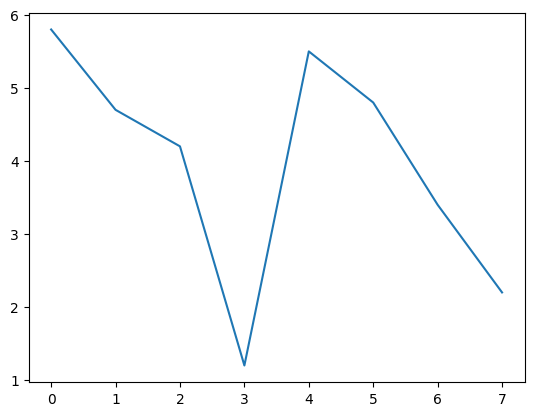

In [17]:
import matplotlib.pyplot as plt

t = [5.8, 4.7, 4.2, 1.2, 5.5, 4.8, 3.4, 2.2]

plt.plot(t)
plt.show()

In [21]:
import torch

t = torch.diag(torch.tensor([1, 2, 3]), -2)
t

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 2, 0, 0, 0],
        [0, 0, 3, 0, 0]])

In [24]:
t = torch.eye(2)*2
t.inverse()

tensor([[0.5000, 0.0000],
        [0.0000, 0.5000]])

In [30]:
qkvmask_num = int(4096/90)+1
fc1mask_num = int((4096/31)/90)+1

values = torch.tensor([1 for i1 in range(512)])
maskqkv = torch.zeros(512, 512)
print(maskqkv)
for i1 in range(qkvmask_num):
    if i1 == 0:
        mask1 = torch.diag(values[:len(values)-i1], i1)
        mask2 = torch.diag(values[:len(values)-i1], -i1)
    else:
        mask1 = torch.diag(0.01*values[:len(values)-i1], i1)
        mask2 = torch.diag(0.01*values[:len(values)-i1], -i1)
    maskqkv = maskqkv + mask1 + mask2
print(maskqkv)
maskqkv = maskqkv - torch.eye(512)
maskqkv

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[2.0000, 0.0100, 0.0100,  ..., 0.0000, 0.0000, 0.0000],
        [0.0100, 2.0000, 0.0100,  ..., 0.0000, 0.0000, 0.0000],
        [0.0100, 0.0100, 2.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 2.0000, 0.0100, 0.0100],
        [0.0000, 0.0000, 0.0000,  ..., 0.0100, 2.0000, 0.0100],
        [0.0000, 0.0000, 0.0000,  ..., 0.0100, 0.0100, 2.0000]])


tensor([[1.0000, 0.0100, 0.0100,  ..., 0.0000, 0.0000, 0.0000],
        [0.0100, 1.0000, 0.0100,  ..., 0.0000, 0.0000, 0.0000],
        [0.0100, 0.0100, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.0100, 0.0100],
        [0.0000, 0.0000, 0.0000,  ..., 0.0100, 1.0000, 0.0100],
        [0.0000, 0.0000, 0.0000,  ..., 0.0100, 0.0100, 1.0000]])

In [ ]:
import matplotlib.pyplot as plt




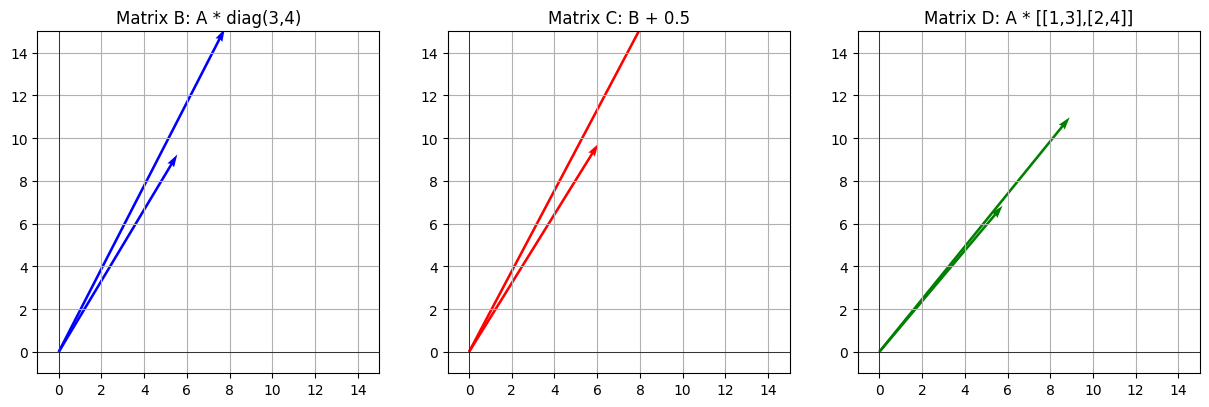

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# 定义矩阵A
A = np.array([[1.5, 2.2], [2.1, 3.6]])

# 变换（1）：A乘以一个对角矩阵diag(3,4)得到B
diag_matrix = np.diag([3.7, 4.2])
B = A @ diag_matrix

# 变换（2）：B加上一个偏移量0.5得到C
C = B + 0.5

# 变换（3）：A乘以一个矩阵[[1,3],[2,4]]得到D
transform_matrix = np.array([[1.5, 0.6], [1.6, 2.7]])
D = A @ transform_matrix

# 绘制向量图
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 绘制矩阵B的向量图
for i in range(B.shape[0]):
    axs[0].quiver(0, 0, B[i, 0], B[i, 1], angles='xy', scale_units='xy', scale=1, color='b')
axs[0].set_xlim(-1, 15)
axs[0].set_ylim(-1, 15)
axs[0].axhline(0, color='black',linewidth=0.5)
axs[0].axvline(0, color='black',linewidth=0.5)
axs[0].grid(True)
axs[0].set_aspect('equal')
axs[0].set_title('Matrix B: A * diag(3,4)')

# 绘制矩阵C的向量图
for i in range(C.shape[0]):
    axs[1].quiver(0, 0, C[i, 0], C[i, 1], angles='xy', scale_units='xy', scale=1, color='r')
axs[1].set_xlim(-1, 15)
axs[1].set_ylim(-1, 15)
axs[1].axhline(0, color='black',linewidth=0.5)
axs[1].axvline(0, color='black',linewidth=0.5)
axs[1].grid(True)
axs[1].set_aspect('equal')
axs[1].set_title('Matrix C: B + 0.5')

# 绘制矩阵D的向量图
for i in range(D.shape[0]):
    axs[2].quiver(0, 0, D[i, 0], D[i, 1], angles='xy', scale_units='xy', scale=1, color='g')
axs[2].set_xlim(-1, 15)
axs[2].set_ylim(-1, 15)
axs[2].axhline(0, color='black',linewidth=0.5)
axs[2].axvline(0, color='black',linewidth=0.5)
axs[2].grid(True)
axs[2].set_aspect('equal')
axs[2].set_title('Matrix D: A * [[1,3],[2,4]]')

plt.show()

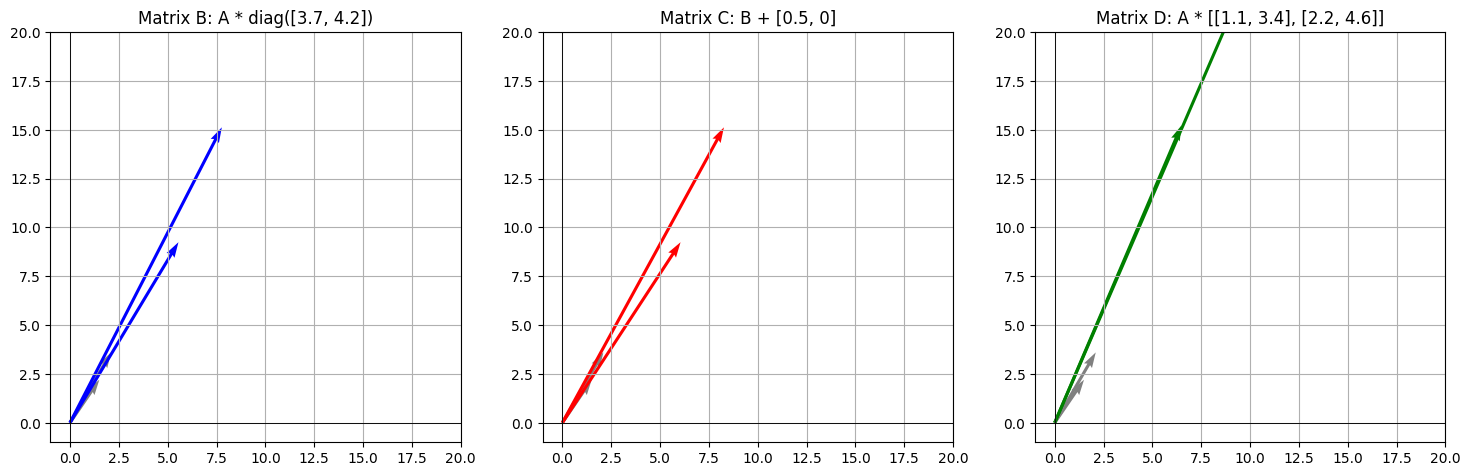

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# 定义矩阵A
A = np.array([[1.5, 2.2], [2.1, 3.6]])

# 变换（1）：A乘以一个对角矩阵diag([3.7, 4.2])得到B
diag_matrix = np.diag([3.7, 4.2])
B = A @ diag_matrix

# 变换（2）：B在xoy平面向右平移0.5得到C
C = B + np.array([0.5, 0])

# 变换（3）：A乘以一个矩阵[[1.1, 3.4], [2.2, 4.6]]得到D
transform_matrix = np.array([[1.1, 3.4], [2.2, 4.6]])
D = A @ transform_matrix

# 创建绘图对象
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 函数：绘制向量图
def plot_vectors(ax, vectors, colors, title, linestyle='-'):
    for vector, color in zip(vectors, colors):
        ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, linestyle=linestyle)
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.grid(True)
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.set_xlim(-1, 20)
    ax.set_ylim(-1, 20)

# 矩阵A的向量（虚线表示）
vectors_A = [A[0], A[1]]
colors_A = ['grey', 'grey']

# 绘制矩阵B的向量图
plot_vectors(axs[0], vectors_A, colors_A, 'Matrix B: A * diag([3.7, 4.2])', linestyle='dashed')
plot_vectors(axs[0], B, ['b', 'b'], 'Matrix B: A * diag([3.7, 4.2])')

# 绘制矩阵C的向量图
plot_vectors(axs[1], vectors_A, colors_A, 'Matrix C: B + [0.5, 0]', linestyle='dashed')
plot_vectors(axs[1], C, ['r', 'r'], 'Matrix C: B + [0.5, 0]')

# 绘制矩阵D的向量图
plot_vectors(axs[2], vectors_A, colors_A, 'Matrix D: A * [[1.1, 3.4], [2.2, 4.6]]', linestyle='dashed')
plot_vectors(axs[2], D, ['g', 'g'], 'Matrix D: A * [[1.1, 3.4], [2.2, 4.6]]')

# 显示图形
plt.show()

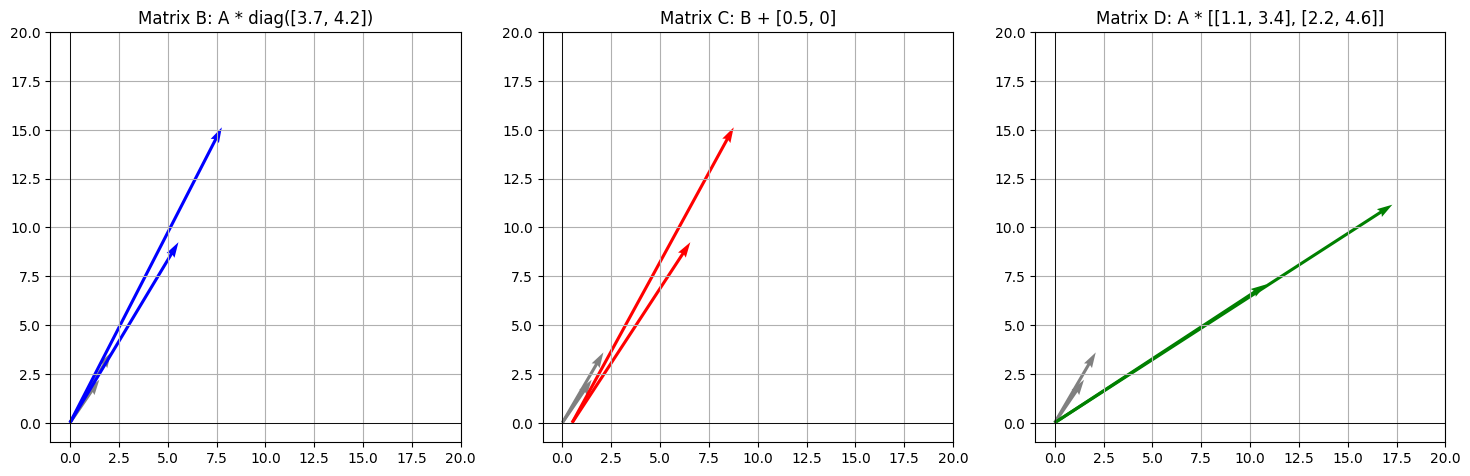

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# 定义矩阵A
A = np.array([[1.5, 2.2], [2.1, 3.6]])

# 变换（1）：A乘以一个对角矩阵diag([3.7, 4.2])得到B
diag_matrix = np.diag([3.7, 4.2])
B = A @ diag_matrix

# 变换（2）：B在xoy平面向右平移0.5得到C
C = B + np.array([0.5, 0])

# 变换（3）：A乘以一个矩阵[[1.1, 3.4], [2.2, 4.6]]得到D
transform_matrix = np.array([[1.2, 1.2], [4.1, 2.4]])
D = A @ transform_matrix

# 创建绘图对象
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 函数：绘制向量图
def plot_vectors(ax, vectors, colors, title, linestyle='-'):
    for vector, color in zip(vectors, colors):
        ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, linestyle=linestyle)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(True)
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.set_xlim(-1, 20)
    ax.set_ylim(-1, 20)

def plot_vectors_with_offset(ax, vectors, offset, colors, title, linestyle='-'):
    for vector, color in zip(vectors, colors):
        ax.quiver(offset[0], offset[1], vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, linestyle=linestyle)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(True)
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.set_xlim(-1, 20)
    ax.set_ylim(-1, 20)

# 矩阵A的向量（虚线表示）
vectors_A = [A[0], A[1]]
colors_A = ['grey', 'grey']

# 绘制矩阵B的向量图
plot_vectors(axs[0], vectors_A, colors_A, 'Matrix B: A * diag([3.7, 4.2])', linestyle='dashed')
plot_vectors(axs[0], B, ['b', 'b'], 'Matrix B: A * diag([3.7, 4.2])')

# 绘制矩阵C的向量图
plot_vectors(axs[1], vectors_A, colors_A, 'Matrix C: B + [0.5, 0]', linestyle='dashed')
plot_vectors_with_offset(axs[1], C, [0.5, 0], ['r', 'r'], 'Matrix C: B + [0.5, 0]')

# 绘制矩阵D的向量图
plot_vectors(axs[2], vectors_A, colors_A, 'Matrix D: A * [[1.1, 3.4], [2.2, 4.6]]', linestyle='dashed')
plot_vectors(axs[2], D, ['g', 'g'], 'Matrix D: A * [[1.1, 3.4], [2.2, 4.6]]')

# 显示图形
plt.show()

In [62]:
from termcolor import colored

colored('(asctime)s (name)s]', 'green')

'\x1b(asctime)s (name)s]\x1b'

In [1]:
import torch

a1 = torch.tensor([3])
a2 = torch.tensor([[4, 5, 6],[7,8,9]])
a1 / a2

tensor([[0.7500, 0.6000, 0.5000],
        [0.4286, 0.3750, 0.3333]])

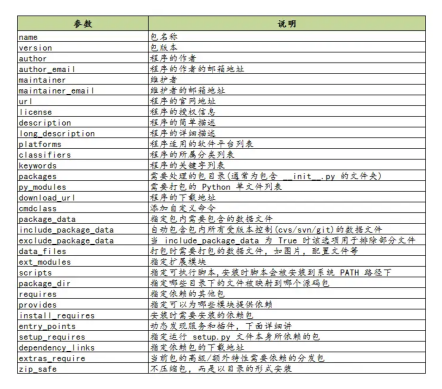

In [1]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# 图片的URL
image_url = "https://pic3.zhimg.com/80/v2-4563e810d05ec25ce283c7f54a271e2e_1440w.webp"

# 发送HTTP请求获取图片内容
response = requests.get(image_url)
response.raise_for_status()  # 确保请求成功

# 将图片内容转换为Image对象
image = Image.open(BytesIO(response.content))

# 显示图片
plt.imshow(image)
plt.axis('off')  # 隐藏坐标轴
plt.show()

In [3]:
try:
    import torch
except:
    print("Please install PyTorch first.")

In [1]:
from tqdm import tqdm

for idx, i in enumerate(tqdm(range(100))):
    print(idx)
    print(i)

100%|██████████| 100/100 [00:00<00:00, 269556.81it/s]

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63
64
64
65
65
66
66
67
67
68
68
69
69
70
70
71
71
72
72
73
73
74
74
75
75
76
76
77
77
78
78
79
79
80
80
81
81
82
82
83
83
84
84
85
85
86
86
87
87
88
88
89
89
90
90
91
91
92
92
93
93
94
94
95
95
96
96
97
97
98
98
99
99


12